# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "C:/Users/Zenbook325E/Downloads/csv"
# dataDir = "D:/AV/Code/location-2"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"
# dataDir = "/home/ababil/BUET/AV/location-2"
# dataDir ="C:/Users/ASUS/Desktop/buetav/behavior-hypotheses-main/location-2"
dataDir = "D:/desktop_alternative/buetav/behavior-hypotheses-main/location-2"


In [2]:
# exec(open('init_notebook.py').read())
# exec(open('C:/Users/ASUS/Desktop/buetav/behavior-hypotheses-main/src/notebooks/init_notebook.py').read())
exec(open('D:/desktop_alternative/buetav/behavior-hypotheses-main/src/notebooks/init_notebook.py').read())

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 210
date = "2023-05-04"
fps=10
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

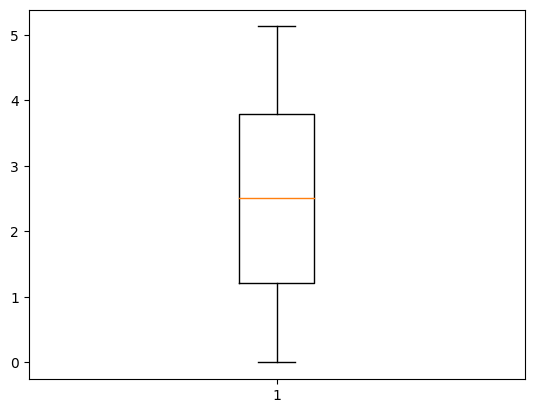

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca1b20c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca1b20e810>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca1b22e8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca1b20c4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca1b20d7d0>],
 'means': []}

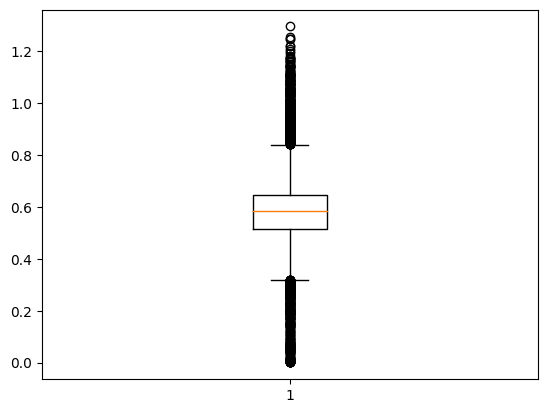

In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        fps=10,
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        # xAccCol='sceneXAcceleration',
        # yAccCol='sceneYAcceleration',
        # accelerationCol='acceleration'
        
    
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    # minAcceleration = -10.0,
    # maxAcceleration = 10.0,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
# transformer.deriveAcceleration(pedDf)
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

using min Y displacement (5)


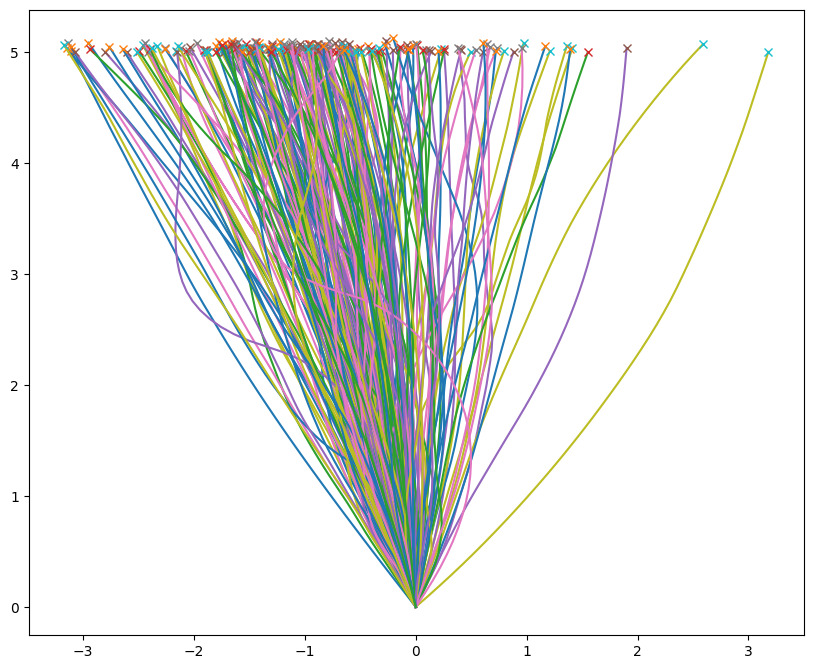

In [7]:
# xCol="sceneX"
# yCol="sceneY"
# cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
# # visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# # visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
# transformer.translateAllToLocalSource(cleanPedDf)

# southIds = []
# for pedId in allPedIds:
#     trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
#     trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
#     # print(trackMeta['verticalDirection'])
#     if trackMeta['verticalDirection'] == "SOUTH":
#         southIds.append(pedId)
#         # print(trackMeta["uniqueTrackId"])
#         X, Y = transformer.rotate180(trackDf,xCol,yCol)
#         # X, Y = transformer.rotate180(trackDf)
#         cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
#         cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y
###########################
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False) 
 
#visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY') 
#visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY') 
allPedIds = list(cleanPedDf["uniqueTrackId"].unique()) 
transformer.translateAllToLocalSource(cleanPedDf) 
#visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY') 
 
southIds = [] 
for pedId in allPedIds: 
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId] 
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0] 
    # print(trackMeta['verticalDirection']) 
    if trackMeta['verticalDirection'] == "SOUTH": 
        southIds.append(pedId) 
        # print(trackMeta["uniqueTrackId"]) 
        X, Y = transformer.rotate180(trackDf,'localX','localY') 
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X 
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y 
 
 
len(cleanPedDf) 
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [8]:

startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1].copy()
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,-0.000000,-0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,-0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,-0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,-0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,-0.032553,0.389772
5,18,760,18023,210,5.0,0.670135,1.967831,-0.040911,0.486252,-0.011395,0.018314,0.487970,0.040735,0.487023,-0.040735,0.487023
6,18,762,18023,210,5.0,0.679707,1.870670,-0.047861,0.485808,0.034750,0.002224,0.488159,0.050307,0.584184,-0.050307,0.584184
7,18,764,18023,210,5.0,0.690215,1.773153,-0.052542,0.487584,0.023403,-0.008883,0.490407,0.060815,0.681701,-0.060815,0.681701
8,18,766,18023,210,5.0,0.701232,1.674626,-0.055084,0.492634,0.012713,-0.025248,0.495704,0.071832,0.780228,-0.071832,0.780228
9,18,768,18023,210,5.0,0.712428,1.575365,-0.055981,0.496305,0.004481,-0.018357,0.499452,0.083028,0.879489,-0.083028,0.879489


{'whiskers': [<matplotlib.lines.Line2D at 0x1ca1bcce110>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca1bccf390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca1bccd750>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca1bcdc550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca1bc72210>],
 'means': []}

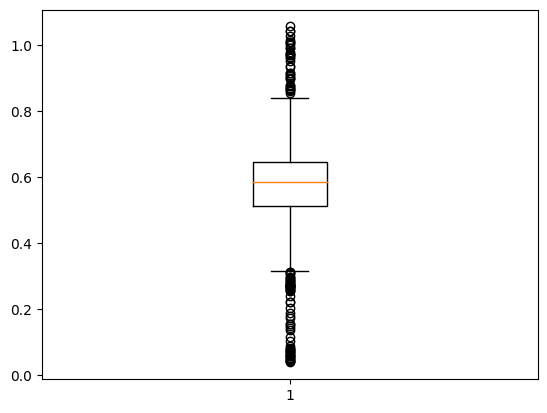

In [9]:
plt.boxplot(startingDf["speed"])

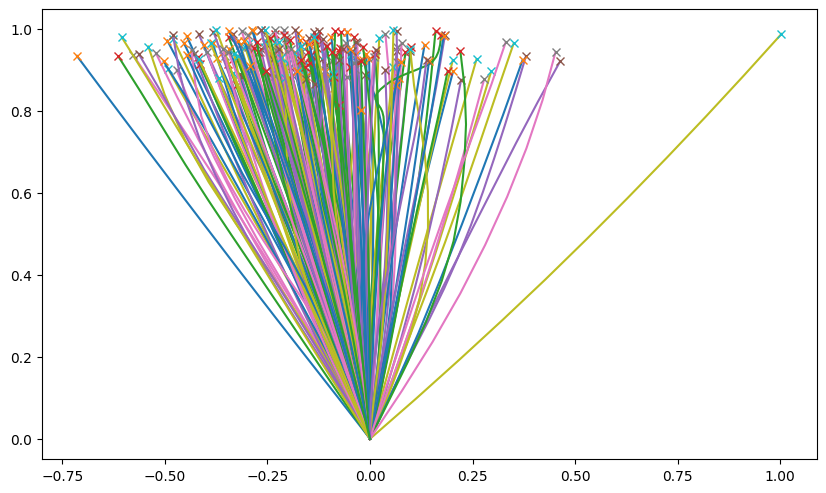

In [10]:
visualizer.show(startingDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

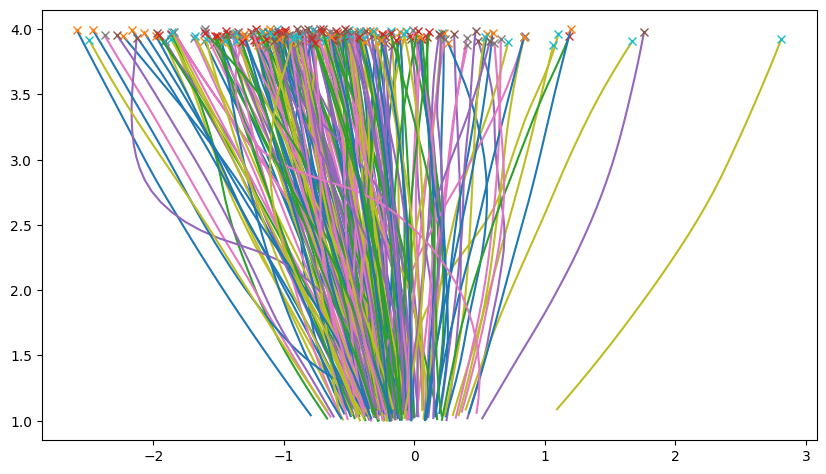

In [11]:
midDf = cleanPedDf[(cleanPedDf["displacementY"] >= 1) & (cleanPedDf["displacementY"] < 4)].copy()
visualizer.show(midDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca1f367790>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca1f374b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca1bdd3610>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca1f3758d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca1f33d550>],
 'means': []}

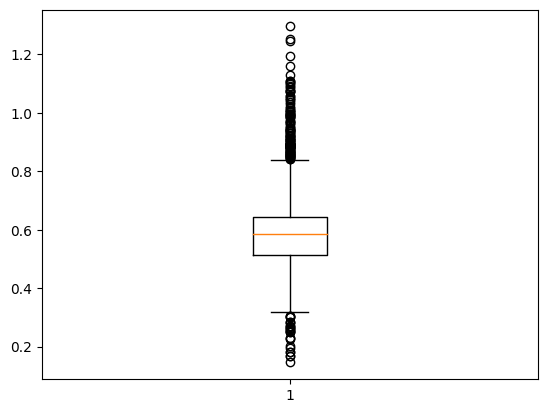

In [12]:
plt.boxplot(midDf["speed"])

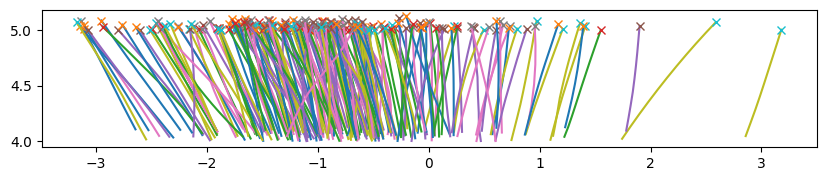

In [13]:
endDf = cleanPedDf[(cleanPedDf["displacementY"] >= 4)].copy()
visualizer.show(endDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca1ee2cad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca1ee2c510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca1ee79e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca1ee2e4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca1eea0290>],
 'means': []}

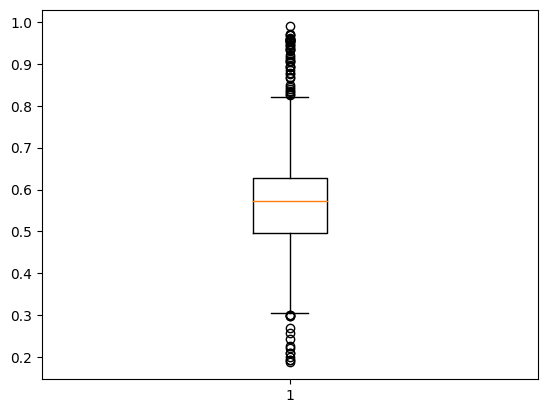

In [14]:
plt.boxplot(endDf["speed"])

<AxesSubplot: xlabel='speed', ylabel='Count'>

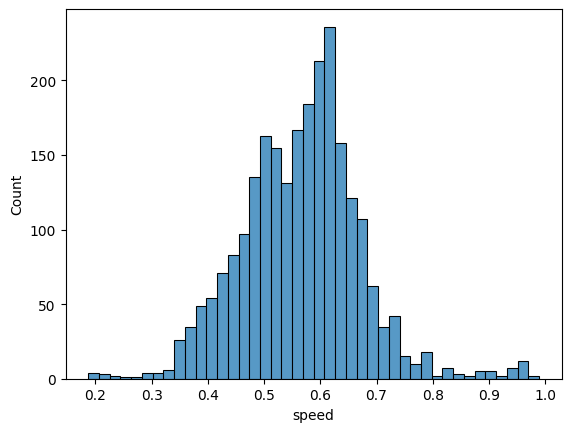

In [15]:
sns.histplot(endDf["speed"])

In [16]:
endDf

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
42,18,834,18023,210,5.0,1.110597,-1.549869,-0.099672,0.450486,-0.004309,0.042872,0.461381,0.481197,4.004723,-0.481197,4.004723
43,18,836,18023,210,5.0,1.131959,-1.638750,-0.106814,0.444405,0.035712,0.030405,0.457062,0.502559,4.093604,-0.502559,4.093604
44,18,838,18023,210,5.0,1.156702,-1.726048,-0.123713,0.436490,0.084492,0.039577,0.453683,0.527302,4.180902,-0.527302,4.180902
45,18,840,18023,210,5.0,1.184650,-1.812759,-0.139742,0.433553,0.080147,0.014684,0.455517,0.555250,4.267613,-0.555250,4.267613
46,18,842,18023,210,5.0,1.214424,-1.898738,-0.148868,0.429895,0.045632,0.018291,0.454941,0.585024,4.353591,-0.585024,4.353591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,29,28395,29542,210,5.0,0.237537,2.188855,0.185355,-0.517096,-0.058848,0.022410,0.549313,1.580843,4.653339,-1.580843,4.653339
25931,29,28397,29542,210,5.0,0.198530,2.291690,0.195039,-0.514172,-0.048420,-0.014621,0.549921,1.619851,4.756174,-1.619851,4.756174
25932,29,28399,29542,210,5.0,0.156704,2.395122,0.209126,-0.517159,-0.070435,0.014934,0.557841,1.661676,4.859606,-1.661676,4.859606
25933,29,28401,29542,210,5.0,0.113808,2.498140,0.214482,-0.515092,-0.026781,-0.010337,0.557962,1.704572,4.962624,-1.704572,4.962624


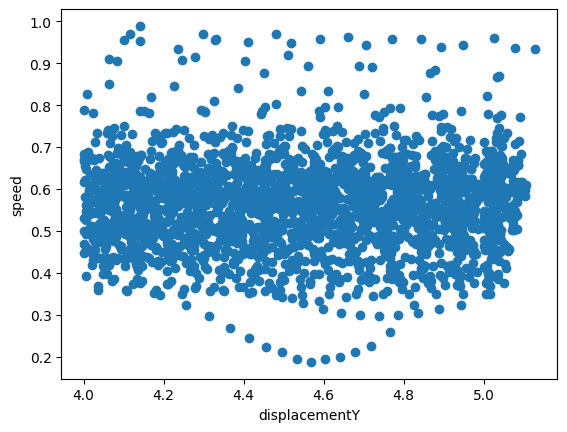

In [17]:
# plot the speed vs displacementY of the pedestrians in the end
plt.scatter(endDf["displacementY"], endDf["speed"])
plt.xlabel("displacementY")
plt.ylabel("speed")
plt.show()

In [18]:
endDf["uniqueTrackId"].unique().shape

(237,)

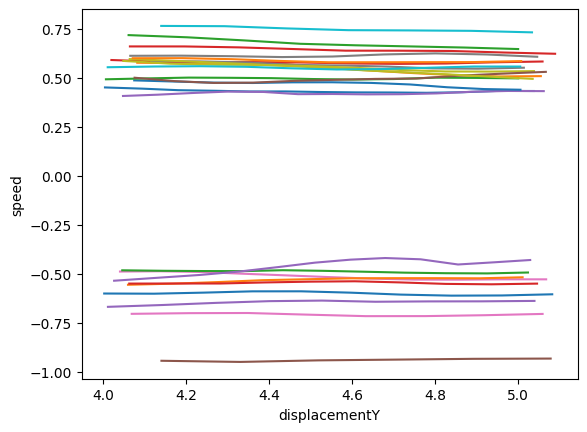

In [19]:
for pedId in endDf["uniqueTrackId"].unique()[:25]:
    trackDf = endDf[endDf["uniqueTrackId"] == pedId]
    plt.plot(trackDf["displacementY"], trackDf["sceneYVelocity"])
plt.xlabel("displacementY")
plt.ylabel("speed")
plt.show()

In [20]:
# find the distribution of pedestrians in the end according to increase/decrease in speed
# new df with each ped and majority speedChange
tempDf = pd.DataFrame(columns=["uniqueTrackId", "speedChange"])
tempDf["uniqueTrackId"] = endDf["uniqueTrackId"].unique()
tempDf["speedChange"] = 0

# first speedChange of each pedestrian is 0
for pedId in endDf["uniqueTrackId"].unique():
    trackDf = endDf[endDf["uniqueTrackId"] == pedId]
    trackDf["speedChange"] = trackDf["sceneYVelocity"].diff()
    # count the number of times the speedChange is positive and negative
    positiveSpeedChange = trackDf[trackDf["speedChange"] > 0].shape[0]
    negativeSpeedChange = trackDf[trackDf["speedChange"] < 0].shape[0]
    if positiveSpeedChange > negativeSpeedChange:
        tempDf.loc[tempDf["uniqueTrackId"] == pedId, "speedChange"] = 1
    elif positiveSpeedChange < negativeSpeedChange:
        tempDf.loc[tempDf["uniqueTrackId"] == pedId, "speedChange"] = -1
    else:
        tempDf.loc[tempDf["uniqueTrackId"] == pedId, "speedChange"] = 0
        
tempDf["speedChange"].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2232\1375401788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackDf["speedChange"] = trackDf["sceneYVelocity"].diff()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2232\1375401788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackDf["speedChange"] = trackDf["sceneYVelocity"].diff()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2232\1375401788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

-1    119
 1     95
 0     23
Name: speedChange, dtype: int64

In [21]:
pedDf.head(5)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772
